# VDJ analysis repeat for revisions

## Initialization

In [1]:
#Library the required

suppressMessages(library(Seurat))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(ggplot2))

suppressMessages(library(stringr))
suppressMessages(library(Stat2Data))
suppressMessages(library(tidyverse))
suppressMessages(library(patchwork))
# library(pheatmap))
suppressMessages(library(viridis)) 
suppressMessages(library(ggplot2))
suppressMessages(library(ggrepel))
suppressMessages(library(scRepertoire))
suppressMessages(library(circlize))
suppressMessages(library(scales))
suppressMessages(library(scCustomize))
suppressMessages(library(DESeq2)) 
suppressMessages(library(languageserver))

Warning message:
"package 'Seurat' was built under R version 4.3.3"
Warning message:
"package 'SeuratObject' was built under R version 4.3.3"
Warning message:
"package 'sp' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'tidyr' was built under R version 4.3.3"
Warning message:
"package 'viridis' was built under R version 4.3.3"
Warning message:
"package 'ggrepel' was built under R version 4.3.3"
Warning message:
"package 'GenomeInfoDb' was built under R version 4.3.3"
Warning message:
"package 'languageserver' was built under R version 4.3.3"


In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 11 x64 (build 22621)

Matrix products: default


locale:
[1] LC_COLLATE=English_United States.utf8 
[2] LC_CTYPE=English_United States.utf8   
[3] LC_MONETARY=English_United States.utf8
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.utf8    

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] languageserver_0.3.16       DESeq2_1.42.0              
 [3] SummarizedExperiment_1.32.0 Biobase_2.62.0             
 [5] MatrixGenerics_1.14.0       matrixStats_1.2.0          
 [7] GenomicRanges_1.54.1        GenomeInfoDb_1.38.8        
 [9] IRanges_2.36.0              S4Vectors_0.40.2           
[11] BiocGenerics_0.48.1         scCustomize_2.0.1          
[13] scales_1.3.0                circlize_0.4.15            
[15] scRep

In [3]:
scRNAseq <- readRDS("m:/LPD-MIS members' data/Verena Link/collaboration/Project_Inta/single_cell_repeat/Seurat_Tcells_final_object_with_VDJ.rds")

In [5]:
glimpse(scRNAseq)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 3
  .. ..$ RNA         :Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. ..$ HTO         :Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. ..$ HTO_combined:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  ..@ meta.data   :'data.frame':	10297 obs. of  34 variables:
  .. ..$ orig.ident                        : Factor w/ 1 level "SeuratProject": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ nCount_RNA                        : num [1:10297] 1839 643 4474 4898 3851 ...
  .. ..$ nFeature_RNA                      : int [1:10297] 1082 471 1679 1954 1748 1471 1635 1883 1231 1728 ...
  .. ..$ nCount_HTO                        : num [1:10297] 100 102 86 176 106 141 130 80 78 159 ...
  .. ..$ nFeature_HTO                      : int [1:10297] 13 16 11 12 14 14 12 15 12 13 ...
  .. ..$ nCount_HTO_combined               : num [1:10297] 100 102 86 176 106 141 130 80 78 159 ...
  .. ..$

## Adding VDJ data again

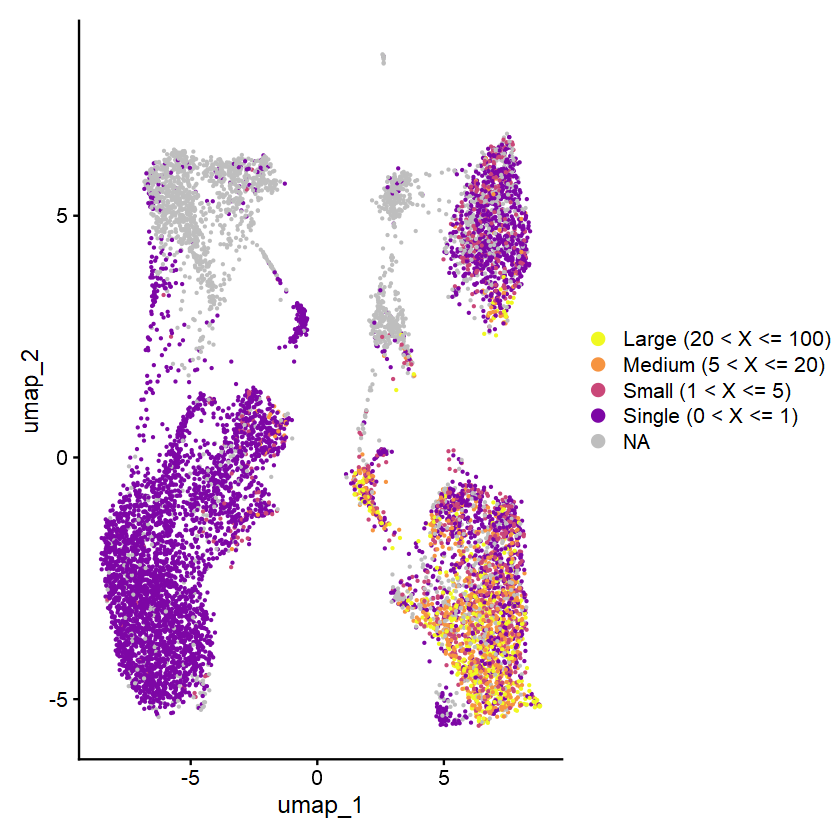

In [5]:
library(Seurat)
library(scRepertoire)

#Add TCR data
TCR_data <- read.csv("m:/LPD-MIS members' data/Verena Link/collaboration/Project_Inta/single_cell_repeat/filtered_contig_annotations_TCR.csv")
#Just keep cells that were not filtered out during scRNA_seq QC
TCR_data_filtered <- subset(TCR_data, TCR_data$barcode %in% names(scRNAseq@active.ident))

#Add samples and treatment to VDJ data
sample_info <- data.frame(barcode = colnames(scRNAseq), 
                          samples = scRNAseq@meta.data$HTO_combined_classification, 
                          ID = scRNAseq@meta.data$consensuscall)

TCR_data_with_info <- merge(TCR_data_filtered, sample_info, by = "barcode")


combined <- combineTCR(TCR_data_filtered, 
                       samples  = c("TCR"))
combined$TCR$barcode <- str_remove(combined$TCR$barcode, "TCR_")

scRNAseq <- combineExpression(combined, scRNAseq, 
                                                                cloneCall="aa", 
                                                                group.by = "sample", 
                                                                proportion = FALSE, 
                                                                cloneSize=c(Single=1, Small=5, Medium=20, Large=100, Hyperexpanded=500))

colorblind_vector <- colorRampPalette(rev(c("#0D0887FF", "#47039FFF", 
                                            "#7301A8FF", "#9C179EFF", "#BD3786FF", "#D8576BFF",
                                            "#ED7953FF","#FA9E3BFF", "#FDC926FF", "#F0F921FF")))
DimPlot(scRNAseq, group.by = "cloneType") +
  scale_color_manual(values = colorblind_vector(5), na.value="grey") + 
  theme(plot.title = element_blank())


In [6]:
colnames(scRNAseq@meta.data)

scRNAseq$tissue <- scRNAseq$HTO_combined_classification

unique(scRNAseq$celltypes)
unique(scRNAseq$celltypes_summary)

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_HTO"                        
 [5] "nFeature_HTO"                       "nCount_HTO_combined"               
 [7] "nFeature_HTO_combined"              "percent.mt"                        
 [9] "MULTI_ID"                           "MULTI_classification"              
[11] "HTO_combined_maxID"                 "HTO_combined_secondID"             
[13] "HTO_combined_margin"                "HTO_combined_classification"       
[15] "HTO_combined_classification.global" "hash.ID"                           
[17] "consensuscall_combined"             "consensuscall_combined.global"     
[19] "consensuscall"                      "consensuscall.global"              
[21] "RNA_snn_res.0.8"                    "seurat_clusters"                   
[23] "categroy"                           "sample"                            
[25] "origin"                             "celltypes"                         
[27] "celltypes_summary"                  "barcode"                           
[29] "CTgene"                             "CTnt"                              
[31] "CTaa"                               "CTstrict"                          
[33] "Frequency"                          "cloneType"                         
[35] "clonalProportion"                   "clonalFrequency"                   
[37] "cloneSize"

[1] "activated memory Th17-like" "Th17-like TFH"             
 [3] "Naive I"                    "Tregs"                     
 [5] "Follicular-like Tregs"      "Naive III"                 
 [7] "memory-like TFH"            "Naive II"                  
 [9] "resident memory T cells"    "tTregs"                    
[11] "TFR"                        "Th1-like TFH"              
[13] "Central memory"             "Th1 cells I"               
[15] "activated T cells"          "effector memory T cells"   
[17] "Th1 cells II"

[1] "activated memory Th17-like" "Th17-like TFH"             
 [3] "Naive"                      "Tregs"                     
 [5] "Follicular-like Tregs"      "memory-like TFH"           
 [7] "resident memory T cells"    "tTregs"                    
 [9] "TFR"                        "Th1-like TFH"              
[11] "Central memory"             "Th1 cells"                 
[13] "activated T cells"          "effector memory T cells"

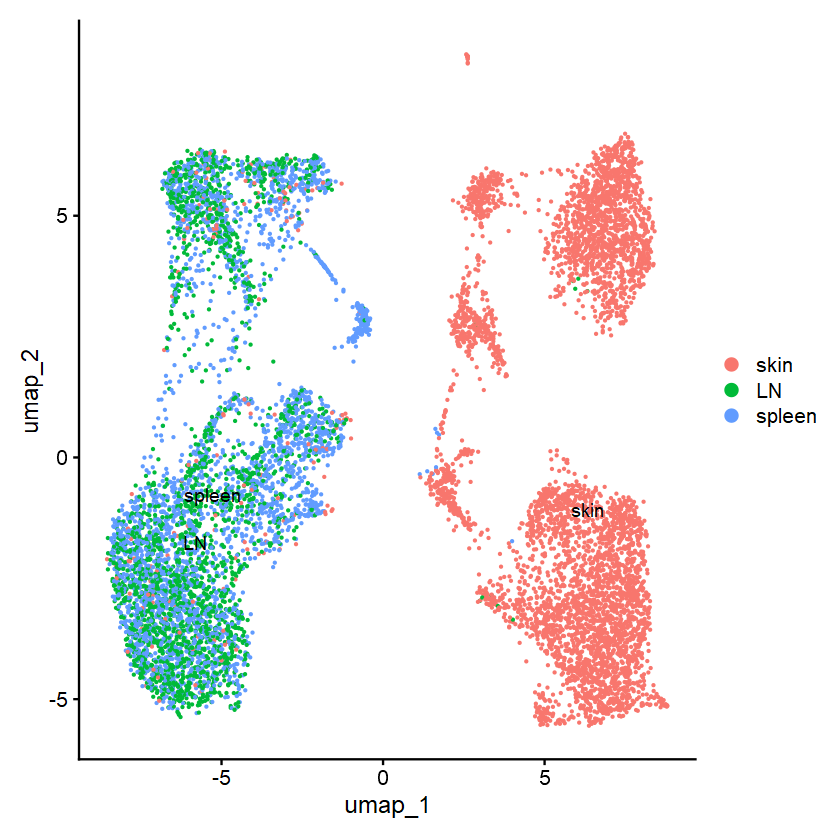

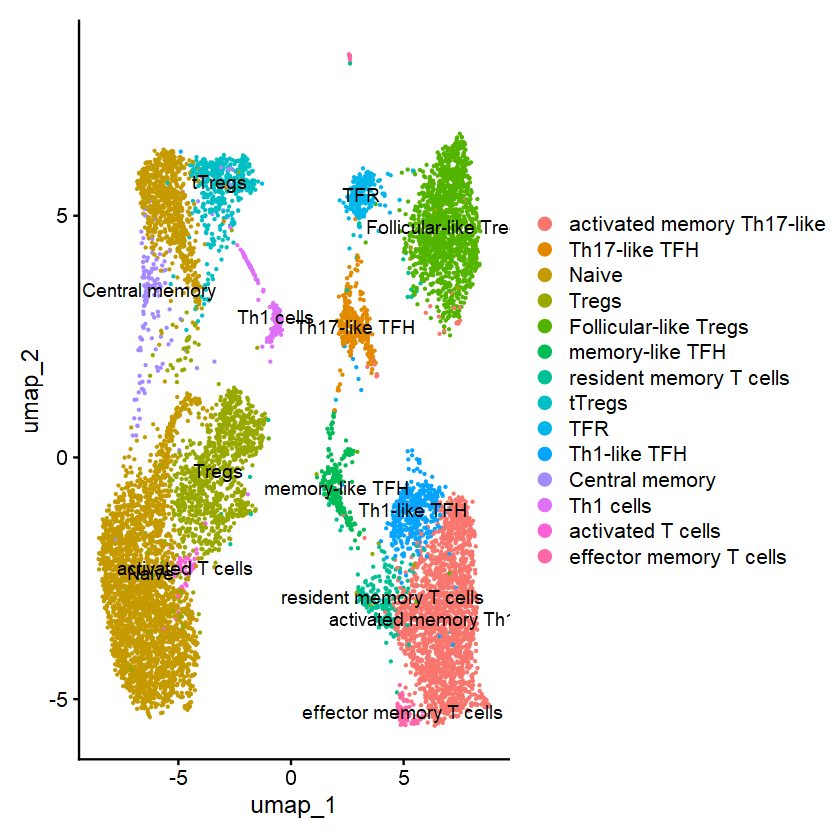

In [7]:
Idents(scRNAseq) <- 'tissue'
DimPlot(scRNAseq, label = T)

Idents(scRNAseq) <- 'celltypes_summary'
DimPlot(scRNAseq, label = T)



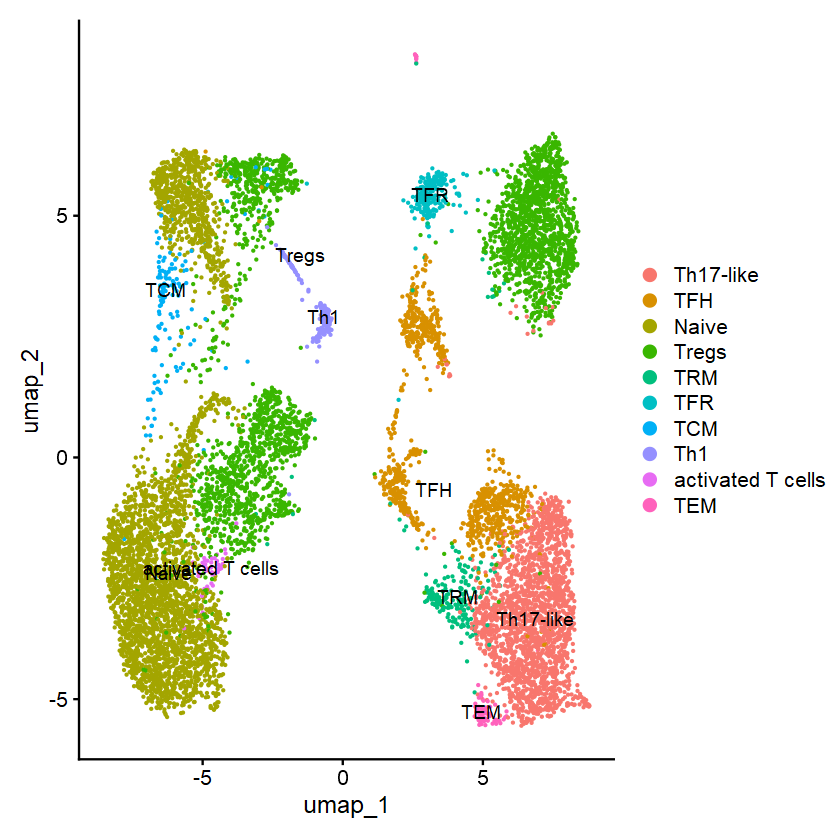

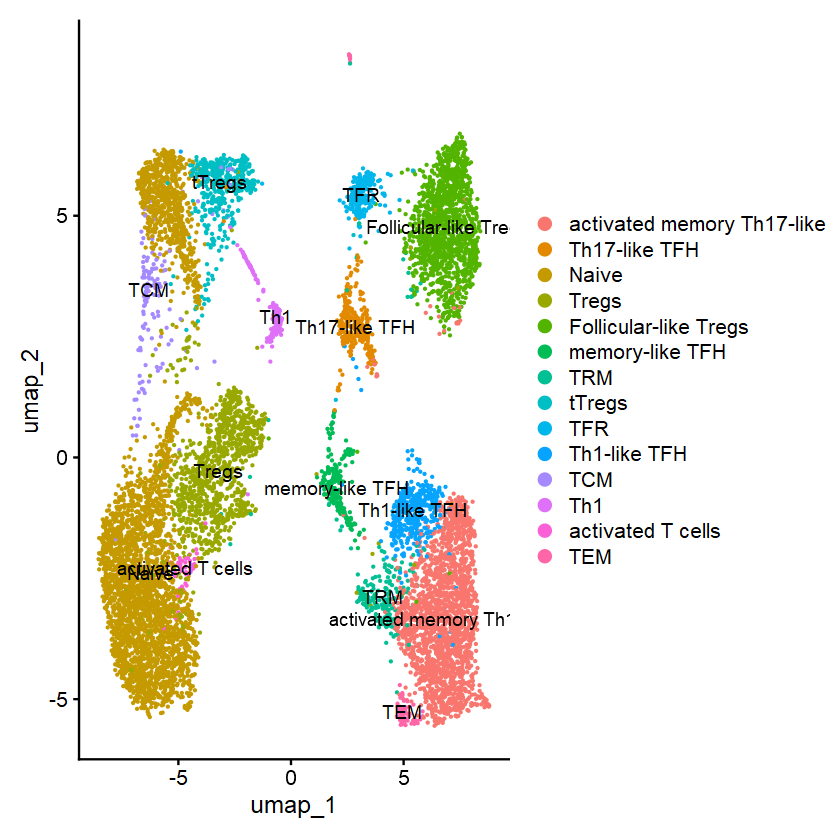

In [8]:
Idents(scRNAseq) <- 'celltypes_summary'
scRNAseq <- RenameIdents(scRNAseq
    , 'activated memory Th17-like' = 'Th17-like'  
    , 'Th17-like TFH' = 'TFH'
    , 'Naive' = 'Naive'
    , 'Tregs' = 'Tregs'
    , 'Follicular-like Tregs' = 'Tregs'
    , 'memory-like TFH' = 'TFH'
    , 'resident memory T cells' = 'TRM'
    , 'tTregs' = 'Tregs' 
    , 'TFR' = 'TFR'
    , 'Th1-like TFH' = 'TFH'
    , 'Central memory' = 'TCM'
    , 'Th1 cells' = 'Th1'
    , 'activated T cells' = 'activated T cells' 
    , 'effector memory T cells' = 'TEM'
)

scRNAseq[['celltypes_summary_2']] <- Idents(scRNAseq)

Idents(scRNAseq) <- 'celltypes_summary_2'
scRNAseq@meta.data <- scRNAseq@meta.data |>
    mutate(celltypes_summary_2 = factor(celltypes_summary_2, levels = c('Naive', 'activated T cells', 'TCM', 'TEM', 'TRM', 'Th1', 'Th17-like', 'TFR', 'Tregs','TFH')))  
DimPlot(scRNAseq, label = T)

# original identities but shorter names:
Idents(scRNAseq) <- 'celltypes_summary'

scRNAseq <- RenameIdents(scRNAseq
    , 'activated memory Th17-like' = 'activated memory Th17-like'  
    , 'Th17-like TFH' = 'Th17-like TFH'
    , 'Naive' = 'Naive'
    , 'Tregs' = 'Tregs'
    , 'Follicular-like Tregs' = 'Follicular-like Tregs'
    , 'memory-like TFH' = 'memory-like TFH'
    , 'resident memory T cells' = 'TRM'
    , 'tTregs' = 'tTregs' 
    , 'TFR' = 'TFR'
    , 'Th1-like TFH' = 'Th1-like TFH'
    , 'Central memory' = 'TCM'
    , 'Th1 cells' = 'Th1'
    , 'activated T cells' = 'activated T cells' 
    , 'effector memory T cells' = 'TEM'
)

scRNAseq[['celltypes_summary_3']] <- Idents(scRNAseq)

Idents(scRNAseq) <- 'celltypes_summary_3'
scRNAseq@meta.data <- scRNAseq@meta.data |>
    mutate(celltypes_summary_2 = factor(celltypes_summary_3, levels = c('Naive', 'activated T cells', 'TCM', 'TEM', 'TRM', 'Th1', 'activated memory Th17-like', 'TFR', 'Tregs', 'tTregs', 'Follicular-like Tregs', 'Th1-like TFH', 'Th17-like TFH', 'memory-like TFH')))  
DimPlot(scRNAseq, label = T)



# Analysis with more detailed cell type annotations

In [2]:
scRNAseq <- readRDS('scRNAseq_Tcells.rds')

In [3]:
Idents(scRNAseq) <- 'celltypes_summary_3'
combined2 <- scRepertoire:::.expression2List(scRNAseq, split.by ='orig.ident')

#head(combined2[[1]])
typeof(combined2[[1]]$CTaa_count)
TCR_data <- combined2[[1]] |> 
    as_tibble() |>
    select(c('CTaa', 'celltypes_summary_3', 'CTgene', 'tissue', 'CTaa_count'))  |>
    add_count(CTaa, celltypes_summary_3, sort = T,name = 'counts_per_celltype') |>
    add_count(CTaa, tissue, sort = T,name = 'counts_per_tissue') |>
    group_by(CTaa, ,celltypes_summary_3, tissue) |>
    slice_head() |>
    ungroup() |>
    arrange(desc(counts_per_celltype))  |>
    pivot_wider(id_cols= c(CTaa, tissue) ,names_from = celltypes_summary_3, values_from = counts_per_celltype,unused_fn = dplyr::first) |>
    pivot_wider(id_cols= c(CTaa) ,names_from = tissue, values_from = counts_per_tissue, unused_fn = dplyr::first) |>
    mutate_all(~replace(., is.na(.), 0))  |>
    arrange(desc(CTaa_count)) |>
    mutate(clonotype = paste0('clonotype ', as.character(row_number()) ))


# Th1_TCR_data <- Th1_TCR_data |> 
#     rowwise() |>
#     mutate(max=max(c_across(contains('rep'))),
#             GF_sum=sum(c_across(contains('GF-'))),
#             SPF_sum=sum(c_across(contains('SPF-')))) |>
#     ungroup() |>
#     mutate(spread=total_CTaa_counts-max,
#         Group_sharing=1-abs(GF_sum-SPF_sum)/total_CTaa_counts) |>
#     arrange( desc(Group_sharing))


    #dplyr::count(CTaa, Frequency, cloneType, Samples, Groups, sort = T)
    #distinct()

    # add_count(CTaa, sort=T)
#head( Th1_TCR_data |> filter(CTaa == 'CAANSNNRIFF_CASSLGASAETLYF') )
#head(TCR_data |> filter(skin > 0 & LN > 0 & spleen > 0))
#head(combined2[[1]] |> filter(CTaa == 'CAVRRGSALGRLHF_CASSLGEDTQYF') |> select('CTgene'))

write_csv(TCR_data, file='TCR_data_cell_type_summary.csv')
typeof(TCR_data$CTaa_count)

TCR_data_plot <- TCR_data |>
                    
                    pivot_longer(!c(CTaa, CTgene, CTaa_count, skin, LN, , spleen, clonotype), names_to = 'cell_type',values_to = 'cell_type_counts')

head(TCR_data_plot)
typeof(TCR_data_plot$CTaa_count)


[1] "double"

[1] "double"

CTaa,skin,LN,spleen,CTgene,CTaa_count,clonotype,cell_type,cell_type_counts
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
CAASEANSGTYQRF_CASSGQGAREQYF,91,0,0,TRAV7-4.TRAJ13.TRAC_TRBV26.TRBD1.TRBJ2-7.TRBC2,91,clonotype 1,activated memory Th17-like,72
CAASEANSGTYQRF_CASSGQGAREQYF,91,0,0,TRAV7-4.TRAJ13.TRAC_TRBV26.TRBD1.TRBJ2-7.TRBC2,91,clonotype 1,Tregs,0
CAASEANSGTYQRF_CASSGQGAREQYF,91,0,0,TRAV7-4.TRAJ13.TRAC_TRBV26.TRBD1.TRBJ2-7.TRBC2,91,clonotype 1,memory-like TFH,13
CAASEANSGTYQRF_CASSGQGAREQYF,91,0,0,TRAV7-4.TRAJ13.TRAC_TRBV26.TRBD1.TRBJ2-7.TRBC2,91,clonotype 1,Th1-like TFH,0
CAASEANSGTYQRF_CASSGQGAREQYF,91,0,0,TRAV7-4.TRAJ13.TRAC_TRBV26.TRBD1.TRBJ2-7.TRBC2,91,clonotype 1,Follicular-like Tregs,3
CAASEANSGTYQRF_CASSGQGAREQYF,91,0,0,TRAV7-4.TRAJ13.TRAC_TRBV26.TRBD1.TRBJ2-7.TRBC2,91,clonotype 1,TRM,1


[1] "double"

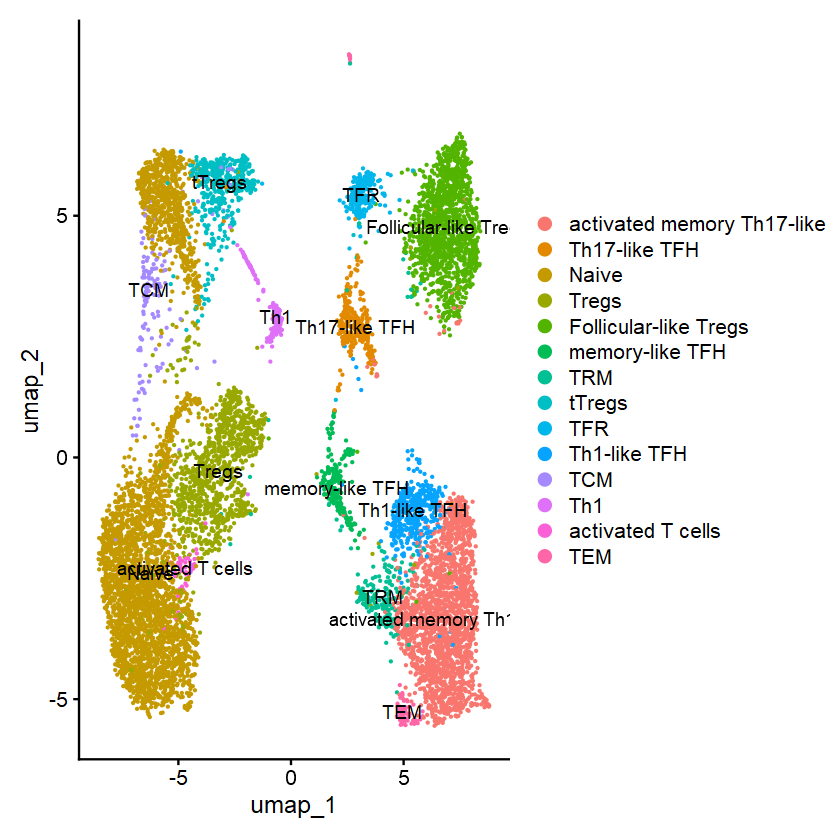

In [4]:
Idents(scRNAseq) <- 'celltypes_summary_3'
DimPlot(scRNAseq, label = T)

# colnames(scRNAseq@meta.data)
# Idents(scRNAseq_skin) <- 'celltypes_summary_3'
# DimPlot(scRNAseq_skin, label = T)

## Circos

In [5]:
unique(TCR_data_plot$cell_type)
TCR_data_plot_old <- TCR_data_plot
unique(TCR_data_plot_old$cell_type)
TCR_data_plot <- TCR_data_plot |>
    filter(skin > 0) |>
    group_by(cell_type) |>
    mutate(TCR_sequence_count_by_cell_type = sum(cell_type_counts)) |>
    arrange(desc(cell_type_counts)) |>
    mutate(TCR_sequence_position_by_cell_type = cumsum(cell_type_counts))  |>
    mutate(TCR_sequence_start_position_by_cell_type =  c(0, TCR_sequence_position_by_cell_type[-length(TCR_sequence_position_by_cell_type)]))   |>
    ungroup() |>
    rowwise() |> 
    mutate(coordinates = list(c(TCR_sequence_start_position_by_cell_type, TCR_sequence_position_by_cell_type))) |>
    ungroup() |>
    mutate(cell_type = factor(cell_type)) |> 
    mutate(cell_type = factor(cell_type, levels = c('Naive', 'activated T cells', 'TCM', 'TEM', 'TRM', 'Th1', 'activated memory Th17-like', 'TFR', 'Tregs', 'tTregs', 'Follicular-like Tregs', 'Th1-like TFH', 'Th17-like TFH', 'memory-like TFH')))  |> 
    filter(!(cell_type %in% c('Naive', 'activated T cells', 'TCM', 'Th1')))
    




#head(TCR_data_plot |> arrange(cell_type_counts) |> filter(cell_type == 'Tregs'), 30)
tail(TCR_data_plot |> filter(cell_type == 'Naive'))
levels(TCR_data_plot$cell_type)

[1] "activated memory Th17-like" "Tregs"                     
 [3] "memory-like TFH"            "Th1-like TFH"              
 [5] "Follicular-like Tregs"      "TRM"                       
 [7] "Naive"                      "Th17-like TFH"             
 [9] "TCM"                        "activated T cells"         
[11] "TFR"                        "tTregs"                    
[13] "TEM"                        "Th1"

[1] "activated memory Th17-like" "Tregs"                     
 [3] "memory-like TFH"            "Th1-like TFH"              
 [5] "Follicular-like Tregs"      "TRM"                       
 [7] "Naive"                      "Th17-like TFH"             
 [9] "TCM"                        "activated T cells"         
[11] "TFR"                        "tTregs"                    
[13] "TEM"                        "Th1"

CTaa,skin,LN,spleen,CTgene,CTaa_count,clonotype,cell_type,cell_type_counts,TCR_sequence_count_by_cell_type,TCR_sequence_position_by_cell_type,TCR_sequence_start_position_by_cell_type,coordinates
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<list>


[1] "Naive"                      "activated T cells"         
 [3] "TCM"                        "TEM"                       
 [5] "TRM"                        "Th1"                       
 [7] "activated memory Th17-like" "TFR"                       
 [9] "Tregs"                      "tTregs"                    
[11] "Follicular-like Tregs"      "Th1-like TFH"              
[13] "Th17-like TFH"              "memory-like TFH"

In [6]:
TCR_data_plot_distinct <- TCR_data_plot |> select(c('cell_type', 'TCR_sequence_count_by_cell_type')) |> distinct() |> arrange(cell_type) |> mutate(origin = TCR_sequence_count_by_cell_type*0) |> column_to_rownames('cell_type') |> relocate(origin)  |> as.matrix()
head(TCR_data_plot_distinct, 12)

,origin,TCR_sequence_count_by_cell_type
TEM,0,54
TRM,0,139
activated memory Th17-like,0,1698
TFR,0,11
Tregs,0,68
tTregs,0,1
Follicular-like Tregs,0,1012
Th1-like TFH,0,347
Th17-like TFH,0,35
memory-like TFH,0,207


In [36]:
###########Circos
path <- './'
pdf(file = paste0(path, 'TCR_Skin_circos', '.pdf')) #Initialize plot

# Setting parameters
circos.par(gap.degree = 2, track.height = 0.1, cell.padding = c(0, 0, 0, 0), circle.margin = 0.8)

# Initializing plot sectors
circos.initialize(xlim = TCR_data_plot_distinct)

#Assigning colors to each cluster
grid_cols <- scales::hue_pal()(length(levels(TCR_data_plot$cell_type))) #|> rev()
    names(grid_cols) <- levels(TCR_data_plot$cell_type)

grid_cols <- c('Naive' = '#c6c59b',
               'activated T cells'  ='#a05c43', 
               'TCM' = '#c598be',
               'TEM' = '#51306c',
               'TRM' = '#c74b83',
               'Th1' = '#cda440',
               'activated memory Th17-like' = '#6da6bc',
               'TFR' = '#6c6acc',
               'Tregs' = '#516939', 
               'tTregs' = '#473036', 
               'Follicular-like Tregs' = '#91d24f', 
               'Th1-like TFH' = '#d54c3a', 
               'Th17-like TFH' = '#68cf9d', 
               'memory-like TFH' = '#a742c7')  

#Drawing axes 
circos.track(ylim = c(0,1),
 panel.fun = function(x, y) {
        
        if (CELL_META$cell.width < 20) {
            circos.text(CELL_META$xcenter, 
            CELL_META$cell.ylim[2] + mm_y(3), 
            adj = c(0 , 1),
            CELL_META$sector.index,
            facing = 'clockwise', 
            niceFacing = T, 
            cex  = 1.2)

            # circos.axis(labels.cex = 1.25, 
            # minor.ticks =  0,
            # major.tick = 1,
            # major.at = seq(0, 10000, by = 50))
            
            

        } else {
            circos.text(CELL_META$xcenter, 
            CELL_META$cell.ylim[2] + mm_y(10),
            #adj = c(0, 1), 
            CELL_META$sector.index,
            facing = 'bending.inside', 
            niceFacing = T,
            cex = 1.2
            )

            circos.axis(labels.cex = 1, 
            minor.ticks =  0,
            major.tick = 1,
            major.at = seq(200, 10000, by = 200))
        }
       
        highlight.sector(CELL_META$sector.index, col = grid_cols[CELL_META$sector.index])
    })

done <- c() #To avoid plotting the same link twice

# Plot links between clusters
for (origin_cell_type in levels(TCR_data_plot$cell_type)) {
    for (target_cell_type in levels(TCR_data_plot$cell_type)) {
        if (origin_cell_type == target_cell_type | target_cell_type %in% done) {
            next
        }    else {
                table_one <- TCR_data_plot |>
                filter(cell_type == origin_cell_type & cell_type_counts != 0)  |>
                select(c('clonotype', 'cell_type', 'coordinates')) 
        
                table_two <- TCR_data_plot |>
                filter(cell_type == target_cell_type & cell_type_counts != 0) |>
                select(c('clonotype', 'cell_type', 'coordinates'))

                link_table  <-  inner_join(table_one, table_two, by = 'clonotype') |> column_to_rownames(var = 'clonotype')

                if (str_detect(origin_cell_type, 'TFH') & (str_detect(target_cell_type, 'Treg') | target_cell_type == 'activated memory Th17-like')) {
                    color = alpha(grid_cols[target_cell_type], 0.6)
                }  else if (str_detect(target_cell_type, 'TFH') & (str_detect(origin_cell_type, 'Treg') | origin_cell_type == 'activated memory Th17-like')) {
                    color = alpha(grid_cols[origin_cell_type], 0.6)                    
                }
                else {
                    color = alpha('grey', 0.15)
                }

                
                # color = alpha(grid_cols[origin_cell_type], 0.5)

                for (clonotype1 in rownames(link_table)) {
                    
                    index1 <- link_table[[clonotype1, 'cell_type.x']]
                    index2 <- link_table[[clonotype1, 'cell_type.y']]
                    coordinates1 <- as.vector(link_table[[clonotype1, 'coordinates.x']])
                    coordinates2 <- as.vector(link_table[[clonotype1, 'coordinates.y']])

                    # Plot link
                    circos.link(link_table[[clonotype1, 'cell_type.x']], 
                                as.vector(link_table[[clonotype1, 'coordinates.x']]),
                                link_table[[clonotype1, 'cell_type.y']],
                                as.vector(link_table[[clonotype1, 'coordinates.y']]),
                                col = color)
                }

        }
    }
    
     done <- c(done, origin_cell_type)

}
    
title('TCR Skin Overlap Between Clusters')

dev.off()

circos.clear()


Note: 1 point is out of plotting region in sector 'TEM', track '1'.

Note: 1 point is out of plotting region in sector 'TEM', track '1'.

Note: 1 point is out of plotting region in sector 'TRM', track '1'.

Note: 1 point is out of plotting region in sector 'TRM', track '1'.

Note: 1 point is out of plotting region in sector 'activated memory
Th17-like', track '1'.

Note: 1 point is out of plotting region in sector 'activated memory
Th17-like', track '1'.

Note: 26 points are out of plotting region in sector 'activated memory
Th17-like', track '1'.

Note: 1 point is out of plotting region in sector 'TFR', track '1'.

Note: 1 point is out of plotting region in sector 'TFR', track '1'.

Note: 1 point is out of plotting region in sector 'Tregs', track '1'.

Note: 1 point is out of plotting region in sector 'Tregs', track '1'.

Note: 1 point is out of plotting region in sector 'tTregs', track '1'.

Note: 1 point is out of plotting region in sector 'tTregs', track '1'.

Note: 1 point is out 

png 
  2

In [57]:
circos.clear()

# Analysis across mice

In [110]:
scRNAseq <- readRDS('scRNAseq_Tcells.rds')

### Morisita

In [111]:
colnames(scRNAseq@meta.data)
unique(scRNAseq$consensuscall_combined)

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_HTO"                        
 [5] "nFeature_HTO"                       "nCount_HTO_combined"               
 [7] "nFeature_HTO_combined"              "percent.mt"                        
 [9] "MULTI_ID"                           "MULTI_classification"              
[11] "HTO_combined_maxID"                 "HTO_combined_secondID"             
[13] "HTO_combined_margin"                "HTO_combined_classification"       
[15] "HTO_combined_classification.global" "hash.ID"                           
[17] "consensuscall_combined"             "consensuscall_combined.global"     
[19] "consensuscall"                      "consensuscall.global"              
[21] "RNA_snn_res.0.8"                    "seurat_clusters"                   
[23] "categroy"                           "sample"                            
[25] "origin"                             "celltypes"                         
[27] "celltypes_summary"                  "barcode"                           
[29] "CTgene"                             "CTnt"                              
[31] "CTaa"                               "CTstrict"                          
[33] "Frequency"                          "cloneType"                         
[35] "clonalProportion"                   "clonalFrequency"                   
[37] "cloneSize"                          "tissue"                            
[39] "celltypes_summary_2"                "celltypes_summary_3"               
[41] "CTaa_count"

[1] HTO4     HTO9     Doublet  HTO23    HTO3     Negative HTO7     HTO22   
 [9] HTO2     HTO16    HTO24    HTO8     HTO5     HTO11    HTO1     HTO6    
[17] HTO21    HTO10    HTO15    HTO20    HTO13    HTO14    HTO19    HTO12   
25 Levels: Doublet HTO1 HTO2 HTO3 HTO4 HTO5 HTO6 HTO7 HTO8 HTO9 HTO10 ... Discordant

In [6]:
Idents(scRNAseq) <- 'consensuscall_combined'
scRNAseq_small <- subset(scRNAseq, subset = tissue == 'skin', idents = c('HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9', 'HTO10'))

Saving 6.67 x 6.67 in image


cluster1,cluster2,HTO1,HTO2,HTO3,HTO4,HTO5,HTO6,HTO7,HTO8,HTO9,HTO10
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
activated memory Th17-like,Follicular-like Tregs,0.1878276,0.08362148,0.1077855,0.0000000,0.1290675,0.1030843,0.00000000,0.03086825,0.0000000,0.0000000
activated memory Th17-like,memory-like TFH,0.8102883,0.86447809,0.4977570,0.5242991,0.2995461,0.5968586,0.13235294,0.54745275,0.2623705,0.3683589
activated memory Th17-like,Naive,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,NA,0.00000000,0.00000000,0.0000000,0.0000000
activated memory Th17-like,TEM,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000
activated memory Th17-like,Th1-like TFH,0.0404674,0.09570581,0.4587452,0.0000000,0.0000000,0.2997275,0.09217138,0.10924370,0.0000000,0.1671130
activated memory Th17-like,Th17-like TFH,0.4522254,0.05777984,0.1054431,0.0000000,NA,0.1126761,0.00000000,0.06770833,NA,NA


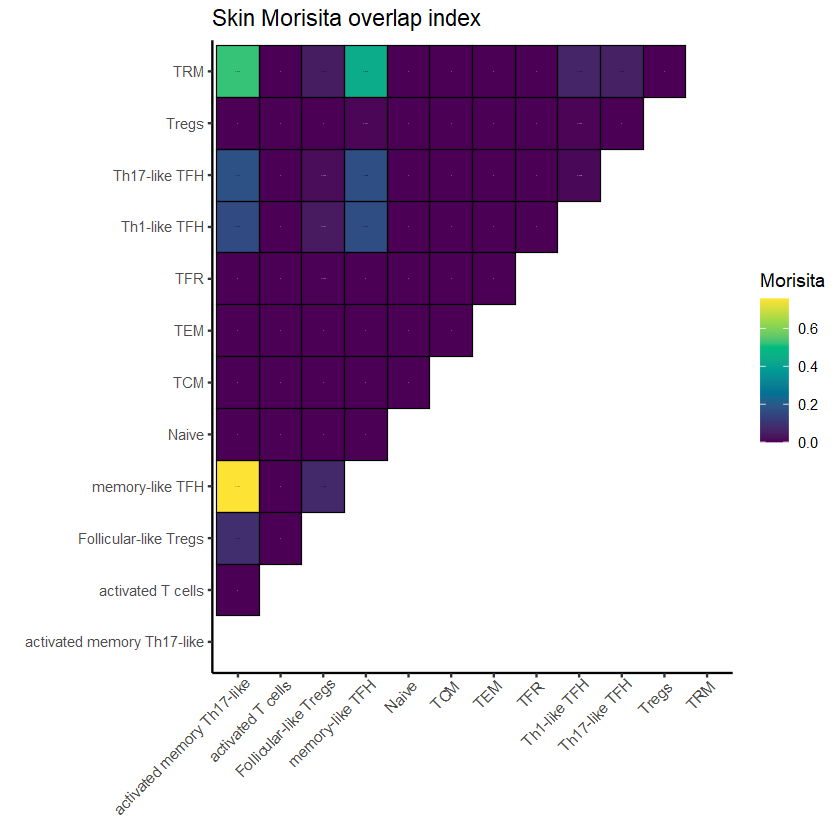

In [11]:
###### Morisita overlap

Idents(scRNAseq_small) <- 'celltypes_summary_3'
combined2 <- scRepertoire:::.expression2List(scRNAseq_small, split. ='ident')

update_geom_defaults('text', aes(size = 0))

clonalOverlap(combined2,
            cloneCall='aa',
            method = 'morisita',
            palette  =  'viridis')+
             
        # labs(title=paste0(str_replace_all(filename,pattern = '_',replacement = ' '), 'Morisita overlap index')) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))+
        ggtitle('Skin Morisita overlap index')

ggsave(paste0('Skin_overlap_between_cell_types_morisita_index.pdf'))


done  <-  c()

rownames <- c()
 
i = 0

for (HTO in c('HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9', 'HTO10')) {
    scRNAseq_local <- subset(scRNAseq_small, subset = consensuscall_combined == HTO) 
    Idents(scRNAseq_local) <- 'celltypes_summary_3'
    combined2 <- scRepertoire:::.expression2List(scRNAseq_local, split. ='ident')
    clonal_overlap_table <- clonalOverlap(combined2,
            cloneCall='aa',
            method = 'morisita',
            exportTable = TRUE)
    clonal_overlap_table  <- clonal_overlap_table |> 
        mutate(cluster1 = colnames(clonal_overlap_table)) |>
        pivot_longer(!cluster1, names_to = 'cluster2' , values_to = HTO) |>
        drop_na()

        if (i == 0) {
                overlap_table <- clonal_overlap_table
                i <- 1
        } else {
                overlap_table <- full_join(overlap_table, clonal_overlap_table,  = c('cluster1', 'cluster2')) 
        }


}        

# ('Naive', 'activated T cells', 'TCM', 'TEM', 'TRM', 'Th1', 'activated memory Th17-like', 'TFR', 'Tregs', 'tTregs', 'Follicular-like Tregs', 'Th1-like TFH', 'Th17-like TFH', 'memory-like TFH')

cluster_pairs <- c('activated memory Th17-like' = 'memory-like TFH',
        'activated memory Th17-like' = 'Th1-like TFH',
        'activated memory Th17-like' = 'Follicular-like Tregs',
        'activated memory Th17-like' = 'Th17-like TFH',
        'Tregs' = 'Th1-like TFH',
        'Tregs' = 'memory-like TFH',
        'Follicular-like Tregs' = 'Th1-like TFH',
        'Follicular-like Tregs' = 'Th17-like TFH',
        'Follicular-like Tregs' = 'memory-like TFH'
        )

# overlap_table <- overlap_table |>
#                 filter(
#                         (cluster1 == 'activated memory Th17-like' & cluster2 == 'memory-like TFH') |
#                         (cluster1 == 'activated memory Th17-like' & cluster2 == 'Th1-like TFH') |
#                         (cluster1 == 'activated memory Th17-like' & cluster2 == 'Follicular-like Tregs') |
#                         (cluster1 == 'activated memory Th17-like' & cluster2 == 'Th17-like TFH') |
#                         (cluster1 == 'Tregs' & cluster2 == 'Th1-like TFH') |
#                         (cluster1 == 'Tregs' & cluster2 == 'memory-like TFH') |
#                         (cluster1 == 'Follicular-like Tregs' & cluster2 == 'Th1-like TFH') |
#                         (cluster1 == 'Follicular-like Tregs' & cluster2 == 'Th17-like TFH') |
#                         (cluster1 == 'Follicular-like Tregs' & cluster2 == 'memory-like TFH') 
#                 ) 


head(overlap_table)

write_csv(overlap_table,file = paste0('Skin_overlap_between_cell_types_and_mice_morisita_index', '.csv'))

#}

# clonal_overlap_table <- clonalOverlap(,
#             cloneCall='aa',
#             method = 'morisita',
#             exportTable = TRUE)
# write_csv(clonal_overlap_table,file = paste0('Skin_overlap_between_cell_types_and_mice_morisita_index', '.csv'))

### Percentage overlap 

In [81]:
Idents(scRNAseq) <- 'consensuscall_combined'
scRNAseq_small <- subset(scRNAseq, idents = c('HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9', 'HTO10', 'HTO19', 'HTO20', 'HTO21', 'HTO22', 'HTO23', 'HTO24'))

### With Combinations, Skin Only

In [5]:


scRNAseq <- readRDS('scRNAseq_Tcells.rds')
#overlap_results_unique <- enframe(local_results_unique)
#overlap_results_unique
Idents(scRNAseq) <- 'consensuscall_combined'
scRNAseq_small <- subset(scRNAseq, idents = c('HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9', 'HTO10'))
#scRNAseq_small <- subset(scRNAseq, idents = c('HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9', 'HTO10', 'HTO19', 'HTO20', 'HTO21', 'HTO22', 'HTO23', 'HTO24'))

combined2 <- scRepertoire:::.expression2List(scRNAseq_small, split.by ='orig.ident')
levels(combined2[[1]]$celltypes_summary_3)

cell_types <- c('activated memory Th17-like', 'Th17-like TFH', 'memory-like TFH', 'Th1-like TFH', 'Follicular-like Tregs', 'TFR')

combinations <- combn(cell_types, 2, simplify=F)


overlap_results_unique  <- tibble()
overlap_results_total <- tibble()
for (HTO in unique(scRNAseq_small$consensuscall_combined)) {

    #Within skin
    skin_table <-  combined2[[1]] |>
        as_tibble() |>
        filter(tissue == 'skin' & consensuscall_combined == HTO) |>
        select(c('CTaa', 'celltypes_summary_3'))  |>
        add_count(celltypes_summary_3, name = 'celltype_count_total') |>
        filter(celltype_count_total > 3) |>
        select(-celltype_count_total) |>
        add_count(CTaa, celltypes_summary_3, name = 'celltype_count_CTaa') |>
        add_count(CTaa, name = 'CTaa_count', sort=T) |>
        
        distinct()  |>
        pivot_wider(id_cols= c(CTaa, CTaa_count) ,names_from = celltypes_summary_3, values_from = celltype_count_CTaa) |>
        mutate_all(~replace(., is.na(.), 0))  |>
        column_to_rownames('CTaa')

    local_results_unique <- c()
    local_results_unique_names <- c()
        local_results_total <- c()
        local_results_total_names <- c()

    for (combination in combinations) {

        cluster_one <- combination[1]
        cluster_two <- combination[2]

        if (!(cluster_one %in% colnames(skin_table) & cluster_two %in% colnames(skin_table))) {
            results = list('NA', 'NA')

            names(results) <- c(paste0(cluster_one, '_to_', cluster_two, '_overlap_unique'), paste0(cluster_one, '_to_', cluster_two, '_overlap_total'))           
            local_results_unique <- c(local_results_unique, results[[1]])
            local_results_unique_names <- c(local_results_unique_names, names(results[1]))
            local_results_total <- c(local_results_total, results[[2]])
            local_results_total_names <- c(local_results_total_names, names(results[2]))

            names(results) <- c(paste0(cluster_two, '_to_', cluster_one, '_overlap_unique'), paste0(cluster_two, '_to_', cluster_one, '_overlap_total'))
            local_results_unique <- c(local_results_unique, results[[1]])
            local_results_unique_names <- c(local_results_unique_names, names(results[1]))
            local_results_total <- c(local_results_total, results[[2]])
            local_results_total_names <- c(local_results_total_names, names(results[2]))

            next
        }
        
        # for (cluster_two in unique(skin_table |> select(-CTaa_count) |> colnames())) {

            # if (cluster_one == cluster_two) {
                #next
            
                
                results <- skin_table |>
                    filter(!!as.name(cluster_one) > 0) |>
                    mutate(
                        overlap_unique = ifelse(!!as.name(cluster_two) > 0, 1, 0),
                        overlap_total = ifelse(!!as.name(cluster_two) > 0, !!as.name(cluster_one), 0),
                        total = sum(!!as.name(cluster_one))) |>
                    summarize(
                        !!as.name(paste0(cluster_one, '_to_', cluster_two, '_overlap_unique')) := sum(overlap_unique)*100/(nrow(skin_table |> filter(!!as.name(cluster_one) > 0))),
                        !!as.name(paste0(cluster_one, '_to_', cluster_two, '_overlap_total')) := sum(overlap_total)*100/sum(!!as.name(cluster_one)))   |>

                    as.vector()                   

                    local_results_unique <- c(local_results_unique, results[[1]])
                    local_results_unique_names <- c(local_results_unique_names, names(results[1]))
                    local_results_total <- c(local_results_total, results[[2]])
                    local_results_total_names <- c(local_results_total_names, names(results[2]))

                results <- skin_table |>
                    filter(!!as.name(cluster_two) > 0) |>
                    mutate(
                        overlap_unique = ifelse(!!as.name(cluster_one) > 0, 1, 0),
                        overlap_total = ifelse(!!as.name(cluster_one) > 0, !!as.name(cluster_two), 0),
                        total = sum(!!as.name(cluster_two))) |>
                    summarize(
                        !!as.name(paste0(cluster_two, '_to_', cluster_one, '_overlap_unique')) := sum(overlap_unique)*100/(nrow(skin_table |> filter(!!as.name(cluster_two) > 0))),                         
                        !!as.name(paste0(cluster_two, '_to_', cluster_one, '_overlap_total')) := sum(overlap_total)*100/sum(!!as.name(cluster_two)))   |>

                    as.vector()                   

                    local_results_unique <- c(local_results_unique, results[[1]])
                    local_results_unique_names <- c(local_results_unique_names, names(results[1]))
                    local_results_total <- c(local_results_total, results[[2]])
                    local_results_total_names <- c(local_results_total_names, names(results[2])) 
            
                

                    
            }
            
    ####################CONTINUE HERE####################
    names(local_results_unique) <- local_results_unique_names
    names(local_results_total) <- local_results_total_names
    #print(local_results_unique)
    #print(enframe(local_results_unique))
    # print(local_results_unique)
    if (length(overlap_results_unique) == 0) {
        overlap_results_unique <- enframe(local_results_unique) |> rename('value' = HTO)      
                    
                } else {
                    overlap_results_unique <- full_join(overlap_results_unique, enframe(local_results_unique) |> rename('value' = HTO), by = 'name')
                }
    if (length(overlap_results_total) == 0) {
        overlap_results_total <- enframe(local_results_total) |> rename('value' = HTO)
    }  else {
        overlap_results_total <- full_join(overlap_results_total, enframe(local_results_total) |> rename('value' = HTO), by = 'name')
    }
                
}





    
head(overlap_results_total)
write.csv(overlap_results_total |> as_tibble(), file = 'TCR_overlap_skin_clusters_percentage_total_sequences.csv')
write.csv(overlap_results_unique |> as_tibble(), file = 'TCR_overlap_skin_clusters_percentage_unique_sequences.csv')
# # cluster_twos <- c('activated memory Th17-like', 'Th17-like TFH', 'memory-like TFH', 'Th1-like TFH', 'Follicular-like Tregs', 'TFR')






[1] "activated memory Th17-like" "Th17-like TFH"             
 [3] "Naive"                      "Tregs"                     
 [5] "Follicular-like Tregs"      "memory-like TFH"           
 [7] "TRM"                        "tTregs"                    
 [9] "TFR"                        "Th1-like TFH"              
[11] "TCM"                        "Th1"                       
[13] "activated T cells"          "TEM"

name,HTO4,HTO9,HTO3,HTO7,HTO2,HTO8,HTO5,HTO1,HTO6,HTO10
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
activated memory Th17-like_to_Th17-like TFH_overlap_total,NA,NA,5.88235294117647,NA,4.243542,NA,NA,18.3206106870229,NA,NA
Th17-like TFH_to_activated memory Th17-like_overlap_total,NA,NA,80,NA,58.333333,NA,NA,50,NA,NA
activated memory Th17-like_to_memory-like TFH_overlap_total,34.8484848484849,15.7894736842105,35.9133126934985,9.09090909090909,57.933579,21.1538461538462,20.4545454545455,40.4580152671756,31.25,19.2307692307692
memory-like TFH_to_activated memory Th17-like_overlap_total,66.6666666666667,50,56.7567567567568,27.2727272727273,77.049180,50,33.3333333333333,67.3469387755102,50,66.6666666666667
activated memory Th17-like_to_Th1-like TFH_overlap_total,0,0,34.0557275541796,13.6363636363636,19.188192,7.69230769230769,NA,5.08905852417303,31.25,15.3846153846154
Th1-like TFH_to_activated memory Th17-like_overlap_total,0,0,58.7628865979381,10.7692307692308,38.181818,16.6666666666667,NA,20.8333333333333,30,16.6666666666667


In [99]:
overlap_results_unique

name,HTO4,HTO9,HTO3,HTO7,HTO2,HTO8,HTO5,HTO1,HTO6,HTO10
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
activated memory Th17-like_to_Th17-like TFH_overlap_unique,NA,NA,3.1496062992126,NA,4.1176471,NA,NA,1.25786163522013,NA,NA
Th17-like TFH_to_activated memory Th17-like_overlap_unique,NA,NA,80,NA,58.3333333,NA,NA,40,NA,NA
activated memory Th17-like_to_memory-like TFH_overlap_unique,10.2564102564103,6.25,11.8110236220472,6.52173913043478,14.1176471,6.45161290322581,6.89655172413793,10.6918238993711,10,14.2857142857143
memory-like TFH_to_activated memory Th17-like_overlap_unique,57.1428571428571,50,48.3870967741936,27.2727272727273,63.1578947,28.5714285714286,33.3333333333333,54.8387096774194,40,60
activated memory Th17-like_to_Th1-like TFH_overlap_unique,0,0,13.3858267716535,8.69565217391304,6.4705882,3.2258064516129,NA,5.0314465408805,10,9.52380952380952
Th1-like TFH_to_activated memory Th17-like_overlap_unique,0,0,31.4814814814815,8.33333333333333,25.0000000,16.6666666666667,NA,20.5128205128205,22.2222222222222,18.1818181818182
activated memory Th17-like_to_Follicular-like Tregs_overlap_unique,0,0,5.51181102362205,0,4.1176471,3.2258064516129,6.89655172413793,5.0314465408805,5,0
Follicular-like Tregs_to_activated memory Th17-like_overlap_unique,0,0,5.69105691056911,0,4.5161290,1.85185185185185,4.16666666666667,5.79710144927536,3.33333333333333,0
activated memory Th17-like_to_TFR_overlap_unique,NA,NA,NA,NA,0.0000000,NA,NA,NA,NA,NA


In [100]:

head(overlap_results_total)


name,HTO4,HTO9,HTO3,HTO7,HTO2,HTO8,HTO5,HTO1,HTO6,HTO10
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
activated memory Th17-like_to_Th17-like TFH_overlap_total,NA,NA,5.88235294117647,NA,4.243542,NA,NA,18.3206106870229,NA,NA
Th17-like TFH_to_activated memory Th17-like_overlap_total,NA,NA,80,NA,58.333333,NA,NA,50,NA,NA
activated memory Th17-like_to_memory-like TFH_overlap_total,34.8484848484849,15.7894736842105,35.9133126934985,9.09090909090909,57.933579,21.1538461538462,20.4545454545455,40.4580152671756,31.25,19.2307692307692
memory-like TFH_to_activated memory Th17-like_overlap_total,66.6666666666667,50,56.7567567567568,27.2727272727273,77.049180,50,33.3333333333333,67.3469387755102,50,66.6666666666667
activated memory Th17-like_to_Th1-like TFH_overlap_total,0,0,34.0557275541796,13.6363636363636,19.188192,7.69230769230769,NA,5.08905852417303,31.25,15.3846153846154
Th1-like TFH_to_activated memory Th17-like_overlap_total,0,0,58.7628865979381,10.7692307692308,38.181818,16.6666666666667,NA,20.8333333333333,30,16.6666666666667


### Overlap with Skin Naive

In [6]:
scRNAseq <- readRDS('scRNAseq_Tcells.rds')
Idents(scRNAseq) <- 'consensuscall_combined'

scRNAseq <- scRNAseq |> subset(idents  = c('Negative', 'Doublet'), invert = T  )

scRNAseq <- RenameIdents(scRNAseq
    , 'HTO1' = 'Mouse_1'  
    , 'HTO2' = 'Mouse_2'
    , 'HTO3' = 'Mouse_3'
    , 'HTO4' = 'Mouse_4'
    , 'HTO5' = 'Mouse_5'
    , 'HTO6' = 'Mouse_6'
    , 'HTO7' = 'Mouse_7'
    , 'HTO8' = 'Mouse_8'
    , 'HTO9' = 'Mouse_9'
    , 'HTO10' = 'Mouse_10'
    , 'HTO11' = 'Mouse_1'
    , 'HTO12' = 'Mouse_2'
    , 'HTO13' = 'Mouse_3'
    , 'HTO14' = 'Mouse_4'
    , 'HTO15' = 'Mouse_5'
    , 'HTO16' = 'Mouse_6'
    , 'HTO19' = 'Mouse_1'
    , 'HTO20' = 'Mouse_2'
    , 'HTO21' = 'Mouse_3'
    , 'HTO22' = 'Mouse_4'
    , 'HTO23' = 'Mouse_5'
    , 'HTO24' = 'Mouse_6'
)

scRNAseq[['mouse']] <- Idents(scRNAseq)
scRNAseq@meta.data <- scRNAseq@meta.data |>
    mutate(tissue_celltype  =  paste(tissue, celltypes_summary_3, sep = '_'))
unique(scRNAseq$tissue_celltype)

# Idents(scRNAseq_small) <- 'celltypes_summary_3'
# scRNAseq_small <- scRNAseq_small |> subset(idents  = c('Naive'), invert = T  )

Idents(scRNAseq) <- 'mouse'
scRNAseq_small <- scRNAseq |> subset(idents  = c('Mouse_7', 'Mouse_8', 'Mouse_9', 'Mouse_10'), invert = T  )

[1] "skin_activated memory Th17-like" "skin_Th17-like TFH"             
 [3] "spleen_Tregs"                    "skin_Follicular-like Tregs"     
 [5] "spleen_Naive"                    "skin_memory-like TFH"           
 [7] "LN_Naive"                        "skin_TRM"                       
 [9] "spleen_tTregs"                   "skin_TFR"                       
[11] "skin_Th1-like TFH"               "spleen_TCM"                     
[13] "LN_TCM"                          "spleen_Th1"                     
[15] "LN_tTregs"                       "LN_activated T cells"           
[17] "LN_Tregs"                        "skin_TCM"                       
[19] "skin_tTregs"                     "skin_TEM"                       
[21] "skin_Tregs"                      "skin_Naive"                     
[23] "spleen_activated T cells"        "spleen_memory-like TFH"         
[25] "LN_Follicular-like Tregs"        "LN_Th1"                         
[27] "skin_activated T cells"          "skin_Th1"                       
[29] "spleen_Th1-like TFH"             "LN_TRM"

In [7]:
# #overlap_results_unique <- enframe(local_results_unique)
# #overlap_results_unique
# Idents(scRNAseq_small) <- 'consensuscall_combined'
# scRNAseq_small <- subset(scRNAseq, idents = c('HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO19', 'HTO20', 'HTO21', 'HTO22', 'HTO23', 'HTO24'))
# #scRNAseq_small <- subset(scRNAseq, idents = c('HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9', 'HTO10', 'HTO19', 'HTO20', 'HTO21', 'HTO22', 'HTO23', 'HTO24'))

combined2 <- scRepertoire:::.expression2List(scRNAseq_small, split.by ='orig.ident')
# levels(combined2[[1]]$tissue_celltype)
colnames(combined2[[1]])

cell_types <- c('skin_activated memory Th17-like', 'skin_Th17-like TFH', 'skin_memory-like TFH', 'Th1-skin_like TFH', 'skin_Follicular-like Tregs', 'skin_TFR', 'spleen_Naive')
mice <- c('Mouse_1', 'Mouse_2', 'Mouse_3', 'Mouse_4', 'Mouse_5', 'Mouse_6')




overlap_results_unique  <- tibble()
overlap_results_total <- tibble()
for (Mouse in mice) {

    #Within skin
    skin_table <-  combined2[[1]] |>
        as_tibble() |>
        filter(tissue_celltype %in% cell_types & mouse == Mouse) |>
        select(c('CTaa', 'tissue_celltype'))  |>
        add_count(CTaa, name = 'CTaa_count', sort=T) |>
        add_count(CTaa, tissue_celltype, name = 'celltype_count') |>
        add_count(tissue_celltype, name = 'celltype_count_total') |>
        filter(celltype_count_total > 3) |>
        distinct()  |>
        select(-celltype_count_total) |> 
        pivot_wider(id_cols= c(CTaa, CTaa_count) ,names_from = tissue_celltype, values_from = celltype_count) |>
        mutate_all(~replace(., is.na(.), 0))  |>
        column_to_rownames('CTaa')

    local_results_unique <- c()
    local_results_unique_names <- c()
        local_results_total <- c()
        local_results_total_names <- c()

    for (skin_cell_type in cell_types) {

        cluster_one <- skin_cell_type
        cluster_two <- 'spleen_Naive'

        if (!(cluster_one %in% colnames(skin_table) & cluster_two %in% colnames(skin_table))) {
            results = list('NA', 'NA')

            names(results) <- c(paste0(cluster_one, '_to_', cluster_two, '_overlap_unique'), paste0(cluster_one, '_to_', cluster_two, '_overlap_total'))           
            local_results_unique <- c(local_results_unique, results[[1]])
            local_results_unique_names <- c(local_results_unique_names, names(results[1]))
            local_results_total <- c(local_results_total, results[[2]])
            local_results_total_names <- c(local_results_total_names, names(results[2]))

            next
        }
        
                results <- skin_table |>
                    filter(!!as.name(cluster_one) > 0) |>
                    mutate(
                        overlap_unique = ifelse(!!as.name(cluster_two) > 0, 1, 0),
                        overlap_total = ifelse(!!as.name(cluster_two) > 0, !!as.name(cluster_one), 0),
                        total = sum(!!as.name(cluster_one))) |>
                    summarize(
                        !!as.name(paste0(cluster_one, '_to_', cluster_two, '_overlap_unique')) := sum(overlap_unique)*100/(nrow(skin_table |> filter(!!as.name(cluster_two) > 0))),
                        !!as.name(paste0(cluster_one, '_to_', cluster_two, '_overlap_total')) := sum(overlap_total)*100/sum(!!as.name(cluster_one)))   |>

                    as.vector()                   

                    local_results_unique <- c(local_results_unique, results[[1]])
                    local_results_unique_names <- c(local_results_unique_names, names(results[1]))
                    local_results_total <- c(local_results_total, results[[2]])
                    local_results_total_names <- c(local_results_total_names, names(results[2]))

            }
            
    ####################CONTINUE HERE####################
    names(local_results_unique) <- local_results_unique_names
    names(local_results_total) <- local_results_total_names
    #print(local_results_unique)
    #print(enframe(local_results_unique))
    # print(local_results_unique)
    if (length(overlap_results_unique) == 0) {
        overlap_results_unique <- enframe(local_results_unique) |> rename('value' = Mouse)      
                    
                } else {
                    overlap_results_unique <- full_join(overlap_results_unique, enframe(local_results_unique) |> rename('value' = Mouse), by = 'name')
                }
    if (length(overlap_results_total) == 0) {
        overlap_results_total <- enframe(local_results_total) |> rename('value' = Mouse)
    }  else {
        overlap_results_total <- full_join(overlap_results_total, enframe(local_results_total) |> rename('value' = Mouse), by = 'name')
    }
                
}





    
head(overlap_results_total, 20)
write.csv(overlap_results_total |> as_tibble(), file = 'TCR_overlap_skin_to_spleen_naive_percentage_total_sequences.csv')
write.csv(overlap_results_unique |> as_tibble(), file = 'TCR_overlap_skin_to_spleen_naive_percentage_unique_sequences.csv')
# # cluster_twos <- c('activated memory Th17-like', 'Th17-like TFH', 'memory-like TFH', 'Th1-like TFH', 'Follicular-like Tregs', 'TFR')






[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_HTO"                        
 [5] "nFeature_HTO"                       "nCount_HTO_combined"               
 [7] "nFeature_HTO_combined"              "percent.mt"                        
 [9] "MULTI_ID"                           "MULTI_classification"              
[11] "HTO_combined_maxID"                 "HTO_combined_secondID"             
[13] "HTO_combined_margin"                "HTO_combined_classification"       
[15] "HTO_combined_classification.global" "hash.ID"                           
[17] "consensuscall_combined"             "consensuscall_combined.global"     
[19] "consensuscall"                      "consensuscall.global"              
[21] "RNA_snn_res.0.8"                    "seurat_clusters"                   
[23] "categroy"                           "sample"                            
[25] "origin"                             "celltypes"                         
[27] "celltypes_summary"                  "barcode"                           
[29] "CTgene"                             "CTnt"                              
[31] "CTaa"                               "CTstrict"                          
[33] "Frequency"                          "cloneType"                         
[35] "clonalProportion"                   "clonalFrequency"                   
[37] "cloneSize"                          "tissue"                            
[39] "celltypes_summary_2"                "celltypes_summary_3"               
[41] "CTaa_count"                         "mouse"                             
[43] "tissue_celltype"                    "ident"

name,Mouse_1,Mouse_2,Mouse_3,Mouse_4,Mouse_5,Mouse_6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
skin_activated memory Th17-like_to_spleen_Naive_overlap_total,0,0,0,0,0,6.25
skin_Th17-like TFH_to_spleen_Naive_overlap_total,0,0,0,NA,NA,NA
skin_memory-like TFH_to_spleen_Naive_overlap_total,2.04081632653061,0,0,0,0,0
Th1-skin_like TFH_to_spleen_Naive_overlap_total,NA,NA,NA,NA,NA,NA
skin_Follicular-like Tregs_to_spleen_Naive_overlap_total,0,0,0,0,0,0
skin_TFR_to_spleen_Naive_overlap_total,NA,0,NA,NA,NA,NA
spleen_Naive_to_spleen_Naive_overlap_total,100,100,100,100,100,100


In [137]:
#Within skin
    skin_table <-  combined2[[1]] |>
        as_tibble() |>
        filter(tissue_celltype %in% cell_types & mouse == 'Mouse_6') |>
        select(c('CTaa', 'tissue_celltype'))  |>
        add_count(CTaa, name = 'CTaa_count', sort=T) |>
        add_count(CTaa, tissue_celltype, name = 'celltype_count') |>
        
        distinct()  |>
        pivot_wider(id_cols= c(CTaa, CTaa_count) ,names_from = tissue_celltype, values_from = celltype_count) |>
        mutate_all(~replace(., is.na(.), 0))  |>
        column_to_rownames('CTaa')
skin_table |> filter( `skin_Th17-like TFH` > 0)
#head(skin_table)

,CTaa_count,skin_activated memory Th17-like,skin_memory-like TFH,skin_Follicular-like Tregs,skin_Th17-like TFH,spleen_Naive,skin_TFR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA_CASSQDNSQNTLYF,4,2,0,0,1,1,0


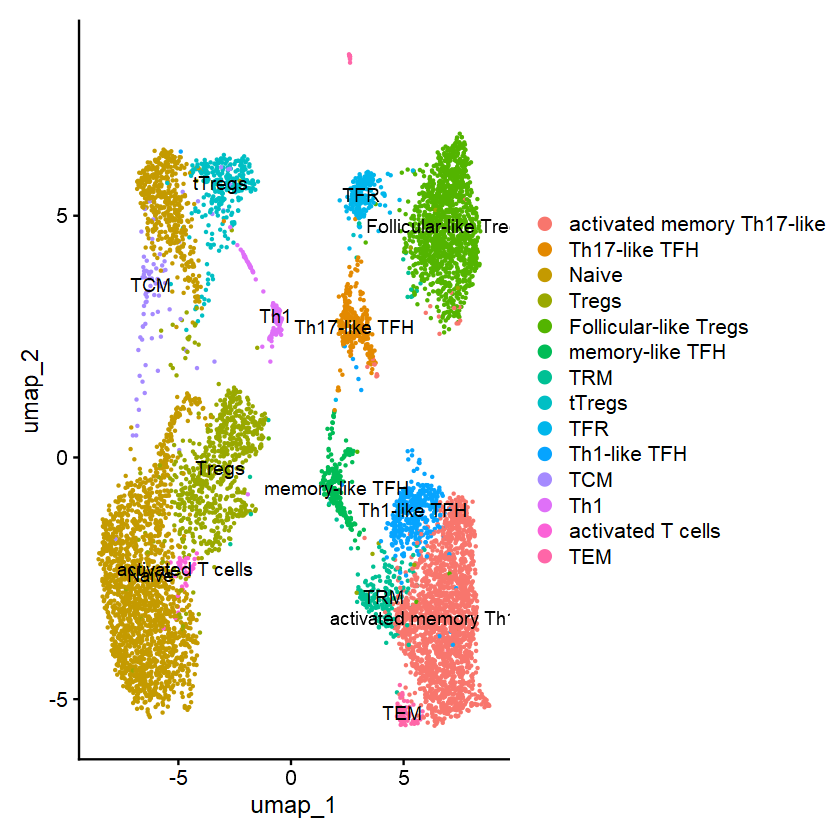

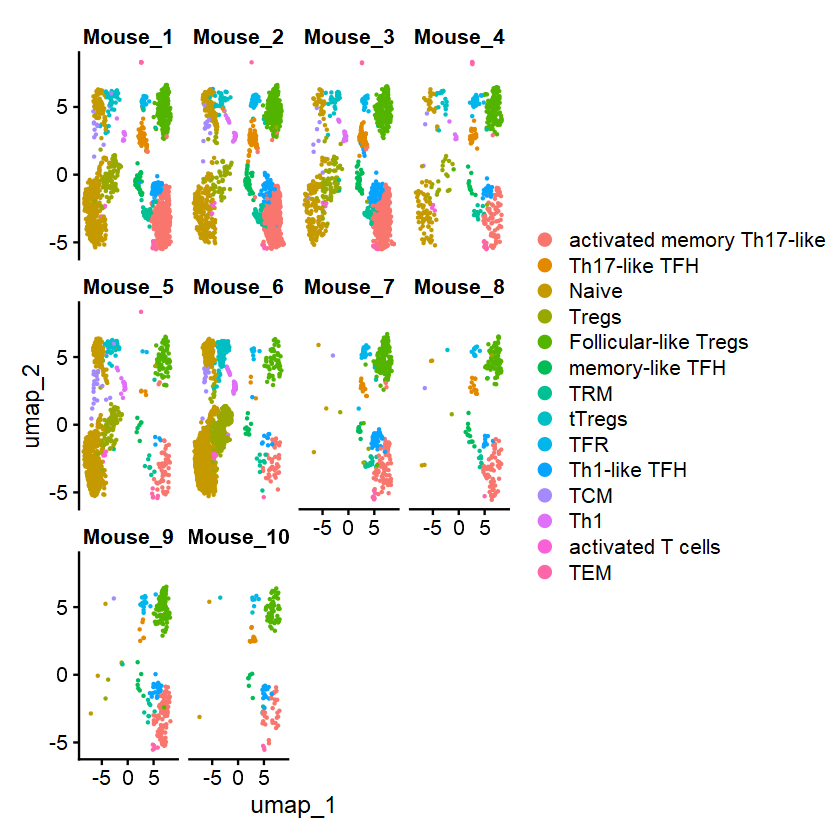

In [150]:
Idents(scRNAseq) <- 'celltypes_summary_3'
Idents(scRNAseq_small) <- 'celltypes_summary_3'
DimPlot(scRNAseq, label = T)
DimPlot(scRNAseq, label = F, split.by = 'mouse', ncol=4)

### D50

In [26]:
#Extracting TCR data for clusters of interest
Idents(scRNAseq_small) <- 'celltypes_summary_3'
combined2 <- scRepertoire:::.expression2List(scRNAseq_small, split.by ='ident')

cell_types <- levels(scRNAseq_small$celltypes_summary_3)

#Initiating results data frame
results <- as.data.frame(matrix(nrow = 0,ncol = length(cell_types)))
colnames(results)
rnames <- c()

#Calculate D50
for (HTO in c('HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9', 'HTO10')) {
    
    result <- c()
    names <- c()

    for (cell_type in cell_types) {
        
        #Extracting data for cell type and HTO
        cell_type_HTO_data <- combined2[[cell_type]]|>
                                    filter(consensuscall_combined == HTO) |>
                                    select(c('consensuscall_combined', 'CTaa')) |>
                                    add_count(CTaa, sort=TRUE)

        #Calculating D50
        if (nrow(cell_type_HTO_data) < 20) {
            D50 <- NA 
        } else {
            L50 <- floor(nrow(cell_type_HTO_data)/2)
            number_unique_50 <- cell_type_HTO_data[1:L50,] %>% summarise(n_distinct(CTaa)) %>% as.numeric()
            number_unique_total <- cell_type_HTO_data[] %>% summarise(n_distinct(CTaa)) %>% as.numeric()
            D50 <- number_unique_50/number_unique_total
        }
        result <- c(result, D50)
    }
    results <- rbind(results, result)
    rnames <- c(rnames, HTO)
    print(HTO)

}

print(rnames)
nrow(results)
colnames(results) <- paste0(cell_types, '_D50')
colnames(results)

results <- results %>% mutate(Mouse=rnames) %>% arrange(Mouse) |> relocate(Mouse)
results

write.csv(results, file=paste0('Skin_D50_per_cell_type.csv'), row.names=FALSE)

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14"

[1] "HTO1"
[1] "HTO2"
[1] "HTO3"
[1] "HTO4"
[1] "HTO5"
[1] "HTO6"
[1] "HTO7"
[1] "HTO8"
[1] "HTO9"
[1] "HTO10"
 [1] "HTO1"  "HTO2"  "HTO3"  "HTO4"  "HTO5"  "HTO6"  "HTO7"  "HTO8"  "HTO9" 
[10] "HTO10"


[1] 10

[1] "activated memory Th17-like_D50" "Th17-like TFH_D50"             
 [3] "Naive_D50"                      "Tregs_D50"                     
 [5] "Follicular-like Tregs_D50"      "memory-like TFH_D50"           
 [7] "TRM_D50"                        "tTregs_D50"                    
 [9] "TFR_D50"                        "Th1-like TFH_D50"              
[11] "TCM_D50"                        "Th1_D50"                       
[13] "activated T cells_D50"          "TEM_D50"

Mouse,activated memory Th17-like_D50,Th17-like TFH_D50,Naive_D50,Tregs_D50,Follicular-like Tregs_D50,memory-like TFH_D50,TRM_D50,tTregs_D50,TFR_D50,Th1-like TFH_D50,TCM_D50,Th1_D50,activated T cells_D50,TEM_D50
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HTO1,0.11320755,NA,NA,NA,0.4420290,0.1935484,0.4230769,NA,NA,0.3846154,NA,NA,NA,NA
HTO10,0.38095238,NA,NA,NA,0.4705882,NA,NA,NA,NA,NA,NA,NA,NA,NA
HTO2,0.07058824,NA,NA,NA,0.3612903,0.2105263,0.2666667,NA,NA,0.3636364,NA,NA,NA,NA
HTO3,0.14173228,NA,NA,NA,0.4227642,0.3870968,NA,NA,NA,0.2037037,NA,NA,NA,NA
HTO4,0.23076923,NA,NA,NA,0.4415584,NA,NA,NA,NA,NA,NA,NA,NA,NA
HTO5,0.24137931,NA,NA,NA,0.4583333,NA,NA,NA,NA,NA,NA,NA,NA,NA
HTO6,0.25000000,NA,NA,NA,0.4000000,NA,NA,NA,NA,NA,NA,NA,NA,NA
HTO7,0.28260870,NA,NA,NA,0.3900000,NA,NA,NA,NA,0.3125000,NA,NA,NA,NA
HTO8,0.25806452,NA,NA,NA,0.4629630,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Percentage overlap

## Initial

In [56]:
colnames(scRNAseq@meta.data)

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_HTO"                        
 [5] "nFeature_HTO"                       "nCount_HTO_combined"               
 [7] "nFeature_HTO_combined"              "percent.mt"                        
 [9] "MULTI_ID"                           "MULTI_classification"              
[11] "HTO_combined_maxID"                 "HTO_combined_secondID"             
[13] "HTO_combined_margin"                "HTO_combined_classification"       
[15] "HTO_combined_classification.global" "hash.ID"                           
[17] "consensuscall_combined"             "consensuscall_combined.global"     
[19] "consensuscall"                      "consensuscall.global"              
[21] "RNA_snn_res.0.8"                    "seurat_clusters"                   
[23] "categroy"                           "sample"                            
[25] "origin"                             "celltypes"                         
[27] "celltypes_summary"                  "barcode"                           
[29] "CTgene"                             "CTnt"                              
[31] "CTaa"                               "CTstrict"                          
[33] "Frequency"                          "cloneType"                         
[35] "clonalProportion"                   "clonalFrequency"                   
[37] "cloneSize"                          "tissue"                            
[39] "celltypes_summary_2"                "celltypes_summary_3"               
[41] "CTaa_count"

In [57]:
Idents(scRNAseq) <- 'consensuscall_combined'

scRNAseq_small <- scRNAseq |> subset(idents  = c('Negative', 'Doublet'), invert = T  )

scRNAseq_small <- RenameIdents(scRNAseq_small
    , 'HTO1' = 'Mouse_1'  
    , 'HTO2' = 'Mouse_2'
    , 'HTO3' = 'Mouse_3'
    , 'HTO4' = 'Mouse_4'
    , 'HTO5' = 'Mouse_5'
    , 'HTO6' = 'Mouse_6'
    , 'HTO7' = 'Mouse_7'
    , 'HTO8' = 'Mouse_8'
    , 'HTO9' = 'Mouse_9'
    , 'HTO10' = 'Mouse_10'
    , 'HTO11' = 'Mouse_1'
    , 'HTO12' = 'Mouse_2'
    , 'HTO13' = 'Mouse_3'
    , 'HTO14' = 'Mouse_4'
    , 'HTO15' = 'Mouse_5'
    , 'HTO16' = 'Mouse_6'
    , 'HTO19' = 'Mouse_1'
    , 'HTO20' = 'Mouse_2'
    , 'HTO21' = 'Mouse_3'
    , 'HTO22' = 'Mouse_4'
    , 'HTO23' = 'Mouse_5'
    , 'HTO24' = 'Mouse_6'
)

scRNAseq_small[['mouse']] <- Idents(scRNAseq_small)
scRNAseq_small@meta.data <- scRNAseq_small@meta.data |>
    mutate(tissue_mouse  =  paste(tissue, mouse, sep = '_'))
unique(scRNAseq_small$tissue_mouse)

# Idents(scRNAseq_small) <- 'celltypes_summary_3'
# scRNAseq_small <- scRNAseq_small |> subset(idents  = c('Naive'), invert = T  )

Idents(scRNAseq_small) <- 'mouse'
scRNAseq_small <- scRNAseq_small |> subset(idents  = c('Mouse_7', 'Mouse_8', 'Mouse_9', 'Mouse_10'), invert = T  )

[1] "skin_Mouse_4"   "skin_Mouse_9"   "spleen_Mouse_5" "skin_Mouse_3"  
 [5] "skin_Mouse_7"   "spleen_Mouse_4" "skin_Mouse_2"   "LN_Mouse_6"    
 [9] "spleen_Mouse_6" "skin_Mouse_8"   "skin_Mouse_5"   "LN_Mouse_1"    
[13] "skin_Mouse_1"   "skin_Mouse_6"   "spleen_Mouse_3" "skin_Mouse_10" 
[17] "LN_Mouse_5"     "LN_Mouse_2"     "spleen_Mouse_2" "LN_Mouse_3"    
[21] "LN_Mouse_4"     "spleen_Mouse_1"

## Skin per cluster analysis

## Global analysis

In [74]:
colnames(scRNAseq_small@meta.data)
unique(scRNAseq_small$mouse)

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_HTO"                        
 [5] "nFeature_HTO"                       "nCount_HTO_combined"               
 [7] "nFeature_HTO_combined"              "percent.mt"                        
 [9] "MULTI_ID"                           "MULTI_classification"              
[11] "HTO_combined_maxID"                 "HTO_combined_secondID"             
[13] "HTO_combined_margin"                "HTO_combined_classification"       
[15] "HTO_combined_classification.global" "hash.ID"                           
[17] "consensuscall_combined"             "consensuscall_combined.global"     
[19] "consensuscall"                      "consensuscall.global"              
[21] "RNA_snn_res.0.8"                    "seurat_clusters"                   
[23] "categroy"                           "sample"                            
[25] "origin"                             "celltypes"                         
[27] "celltypes_summary"                  "barcode"                           
[29] "CTgene"                             "CTnt"                              
[31] "CTaa"                               "CTstrict"                          
[33] "Frequency"                          "cloneType"                         
[35] "clonalProportion"                   "clonalFrequency"                   
[37] "cloneSize"                          "tissue"                            
[39] "celltypes_summary_2"                "celltypes_summary_3"               
[41] "CTaa_count"                         "mouse"                             
[43] "tissue_mouse"

[1] Mouse_4 Mouse_5 Mouse_3 Mouse_2 Mouse_6 Mouse_1
10 Levels: Mouse_1 Mouse_2 Mouse_3 Mouse_4 Mouse_5 Mouse_6 Mouse_7 ... Mouse_10

In [80]:
test <- tibble(.rows  = 4)
#head(test)




1
2
3
4

In [92]:

combined2 <- scRepertoire:::.expression2List(scRNAseq_small, split.by ='orig.ident')

results <- tibble(.rows = 8)
sequences_results <- tibble(.rows = 4)

for (Mouse in unique(scRNAseq_small$mouse)) {

    print(Mouse)
    TCR_data <- combined2[[1]] |> 
        as_tibble() |>
        filter(mouse == Mouse) |> 
        select(c('CTaa', 'tissue'))  |>
        add_count(CTaa, name = 'CTaa_count')  |> 
        add_count(CTaa, tissue, name = 'tissue_count')  |>
        distinct() 

    TCR_data2 <- TCR_data |> 
        pivot_wider(id_cols= c(CTaa) ,names_from = tissue, values_from = tissue_count, unused_fn = max) |>
        mutate_all(~replace(., is.na(.), 0))  |>
        filter(skin > 0) |> 
        arrange( desc(CTaa_count), CTaa )

    total_unique_clones <- TCR_data2 |> pull(CTaa) |> n_distinct()
    total_unique_sequences <- TCR_data2 |>pull(skin) |> sum()


    clones_percent_skin_unique <- TCR_data2 |> filter(LN == 0 & spleen == 0) |> pull(CTaa) |> n_distinct()*100/total_unique_clones
    sequences_percent_skin_unique <- TCR_data2 |> filter(LN == 0 & spleen == 0) |> pull(skin) |> sum()*100/total_unique_sequences

    clones_percent_overlap_with_LN_only <- TCR_data2 |> filter(LN  >  0 & spleen == 0) |> pull(CTaa) |> n_distinct()*100/total_unique_clones
    sequences_percent_overlap_with_LN_only <- TCR_data2 |> filter(LN > 0 & spleen == 0) |> pull(skin) |> sum()*100/total_unique_sequences

    clones_percent_overlap_with_spleen_only <- TCR_data2 |> filter(LN ==  0 & spleen > 0) |> pull(CTaa) |> n_distinct()*100/total_unique_clones
    sequences_percent_overlap_with_spleen_only <- TCR_data2 |> filter(LN  ==  0 & spleen > 0) |> pull(skin) |> sum()*100/total_unique_sequences

    clones_percent_overlap_with_spleen_and_LN <- TCR_data2 |> filter(LN >  0 & spleen > 0) |> pull(CTaa) |> n_distinct()*100/total_unique_clones
    sequences_percent_overlap_with_spleen_and_LN <- TCR_data2 |> filter(LN  >  0 & spleen > 0) |> pull(skin) |> sum()*100/total_unique_sequences

    mouse_results <- c(clones_percent_skin_unique, clones_percent_overlap_with_LN_only, clones_percent_overlap_with_spleen_only, clones_percent_overlap_with_spleen_and_LN, sequences_percent_skin_unique, sequences_percent_overlap_with_LN_only, sequences_percent_overlap_with_spleen_only, sequences_percent_overlap_with_spleen_and_LN)


    results <- bind_cols(results, tibble(Mouse = mouse_results))

}
row_names  <-  c('clones_percent_skin_unique', 'clones_percent_overlap_with_LN_only', 'clones_percent_overlap_with_spleen_only', 'clones_percent_overlap_with_spleen_and_LN', 'sequences_percent_skin_unique', 'sequences_percent_overlap_with_LN_only', 'sequences_percent_overlap_with_spleen_only', 'sequences_percent_overlap_with_spleen_and_LN')
results <- results |> mutate(Metric = row_names) |> relocate(Metric)
head(results)

write.csv(results, file = 'TCR_overlap_between_tissues_final.csv', row.names = FALSE)

[1] "Mouse_4"
[1] "Mouse_5"


New names:
• `Mouse` -> `Mouse...1`
• `Mouse` -> `Mouse...2`


[1] "Mouse_3"


New names:
• `Mouse` -> `Mouse...3`


[1] "Mouse_2"


New names:
• `Mouse` -> `Mouse...4`


[1] "Mouse_6"


New names:
• `Mouse` -> `Mouse...5`


[1] "Mouse_1"


New names:
• `Mouse` -> `Mouse...6`


Metric,Mouse...1,Mouse...2,Mouse...3,Mouse...4,Mouse...5,Mouse...6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
clones_percent_skin_unique,100,98.9583333,99.0506329,99.7542998,91.428571,98.3651226
clones_percent_overlap_with_LN_only,0,1.0416667,0.0000000,0.0000000,1.428571,0.8174387
clones_percent_overlap_with_spleen_only,0,0.0000000,0.9493671,0.2457002,5.714286,0.8174387
clones_percent_overlap_with_spleen_and_LN,0,0.0000000,0.0000000,0.0000000,1.428571,0.0000000
sequences_percent_skin_unique,100,99.1735537,95.3198128,99.8936170,86.597938,97.5679542
sequences_percent_overlap_with_LN_only,0,0.8264463,0.0000000,0.0000000,1.030928,0.5722461
